<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week6_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 7***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---

# **D. PRAKTIKUM FILTER**

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Load Library

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [14]:
# c. Buatlah fungsi konvolusi.

def convolution(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))  # flip kernel
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int(((xImgShape - xKernShape + 2*padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2*padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    imagePadded = np.zeros((xImgShape + padding*2, yImgShape + padding*2))
    imagePadded[padding:imagePadded.shape[0]-padding, padding:imagePadded.shape[1]-padding] = image

    for y in range(0, yImgShape, strides):
        if y > yImgShape - yKernShape:
            break
        for x in range(0, xImgShape, strides):
            if x > xImgShape - xKernShape:
                break
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
    return output

In [15]:
#Load Citra Mernjadi Keabuan
img = cv.imread('//content/drive/MyDrive/PCVK25_3F_11/Gambar/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [16]:
# Kernel Filter
# a. Sharpening
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# b. Emboss
emboss_kernel = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

# c. Sobel (Edge Detection - arah horizontal/vertical)
sobel_kernel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

# d. Canny
canny_kernel = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

# e. Gaussian Blur (21x21)
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

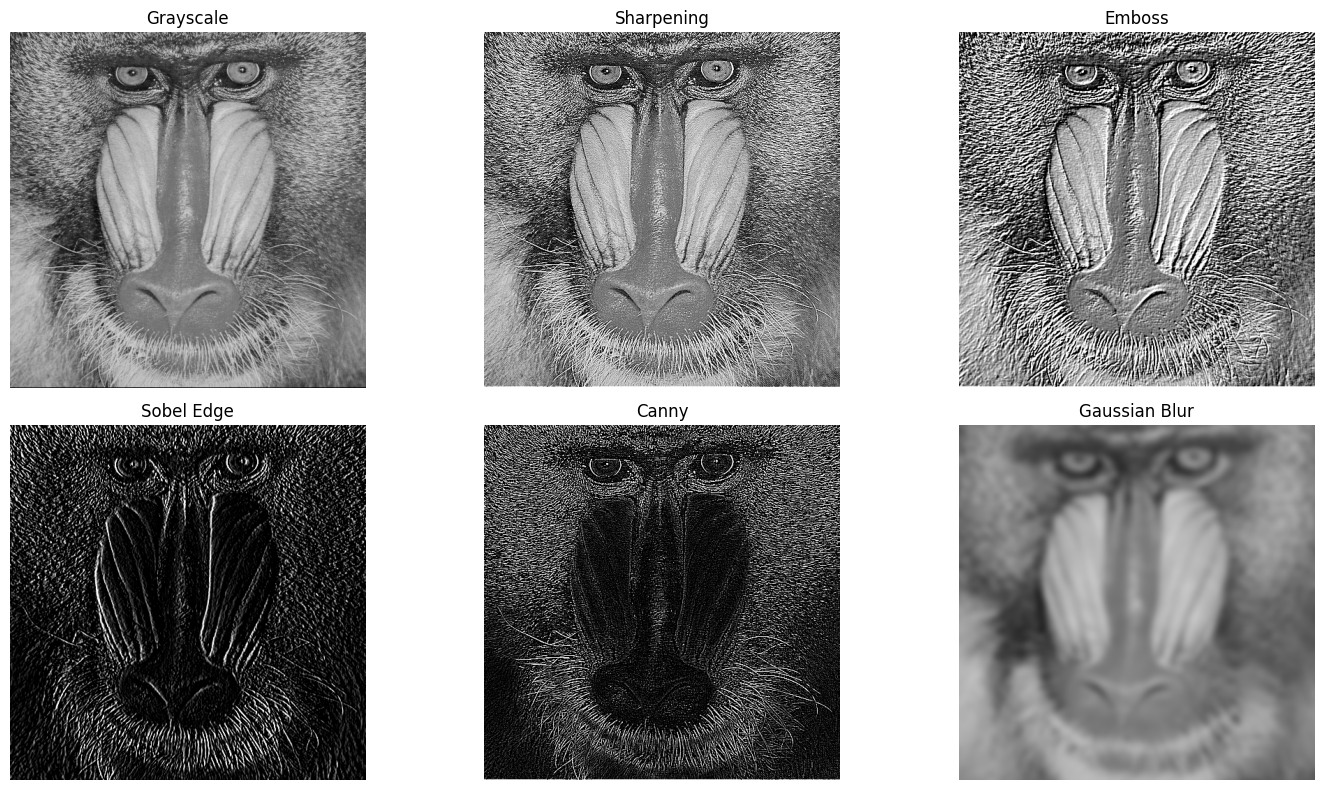

In [27]:

# pemanggilan fungsi
sharpened = convolution(img_gray, sharpen_kernel)
embossed  = convolution(img_gray, emboss_kernel)
edges     = convolution(img_gray, sobel_kernel)
canny     = convolution(img_gray, canny_kernel)
gaussian_blur = convolution(img_gray, gauss_kernel)

titles = ['Grayscale', 'Sharpening', 'Emboss', 'Sobel Edge', 'Canny', 'Gaussian Blur']
images = [img_gray, sharpened, embossed, edges, canny, gaussian_blur]

plt.figure(figsize=(15, 8))

for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    # tampilkan dengan skala asli (0–255) biar sama seperti cv.imshow
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i], fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()
